In [1]:
import pandas as pd
import missingno as msno

# 缺失值处理

In [2]:
# 加载数据
train = pd.read_csv('./data/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 缺失情况统计函数
def missing_values_table(df):
    # 计算所有的缺失值
    mis_val = df.isnull().sum()

    # 计算缺失值的比例
    mis_val_percent = 100 * mis_val / len(df)

    # 将结果拼接成 DataFrame
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # 将列重命名
    mis_val_table.columns = ['缺失值', '占比(%)']

    # 将缺失值为0的列去除，并按照缺失值占比进行排序
    mis_val_table_sorted = mis_val_table[mis_val_table['缺失值']!=0].sort_values(
        '占比(%)', ascending=False)

    # 打印信息
    print(f'传入的数据集共{df.shape[1]}列，\n其中{mis_val_table_sorted.shape[0]}列有缺失值')

    return mis_val_table_sorted

In [4]:
missing_values_table(train)

传入的数据集共12列，
其中3列有缺失值


,缺失值,占比(%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


## 删除方式

### 删除含有缺失值的行

**按行删除：删除指定列为缺失值的行记录，当数据记录比较多，而缺失的行占比较小时，可以考虑删除含有缺失值的行**

0


<AxesSubplot:>

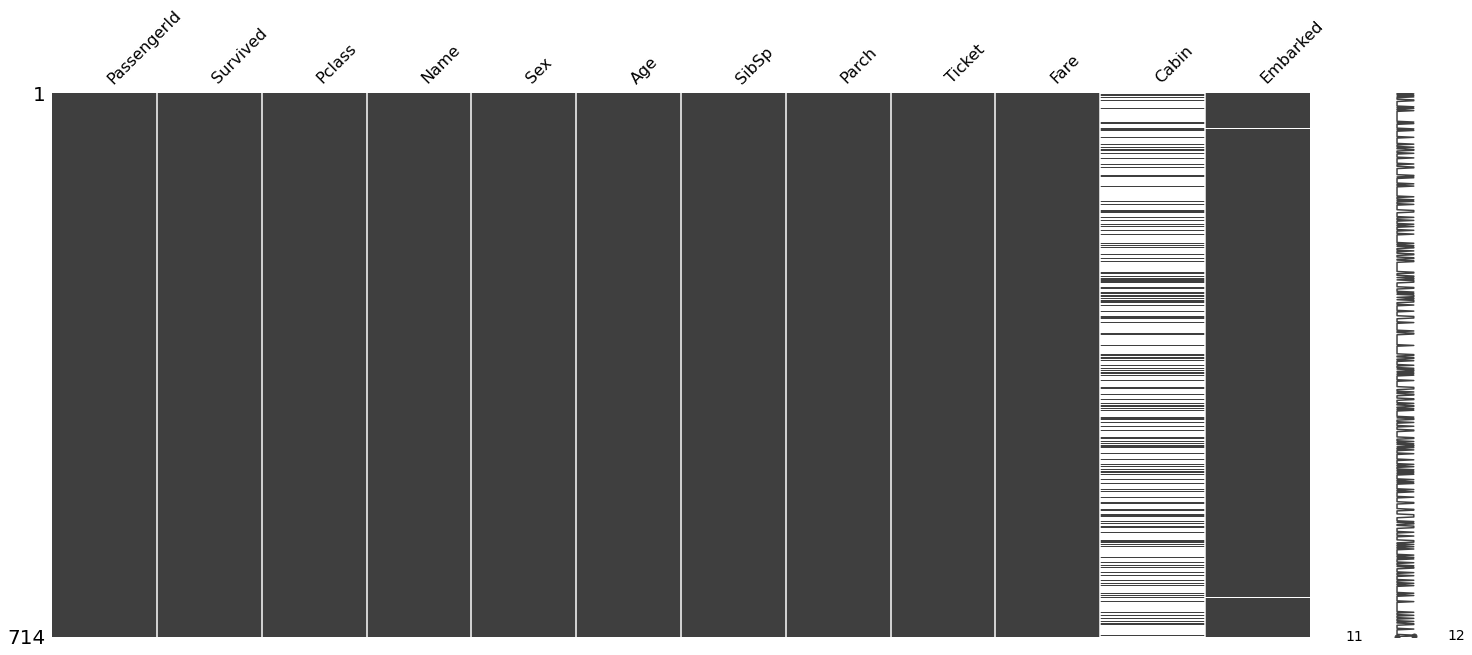

In [5]:
# 复制一份数据
train_cp = train.copy() 
# 对Age列进行处理，空值就删除整行数据
train_cp.dropna(subset=['Age'], how='any', inplace=True)
# 输出Age列缺失值的总数
print(train_cp['Age'].isnull().sum())
# 图形化缺失值情况
msno.matrix(train_cp)

### 删除含有缺失值的列

**按列删除：当一列包含了很多缺失值的时候（比如超过80%），可以使用df.drop(['列名',..], axis=1)函数将指定列删除，但最好不要删除数据**

<AxesSubplot:>

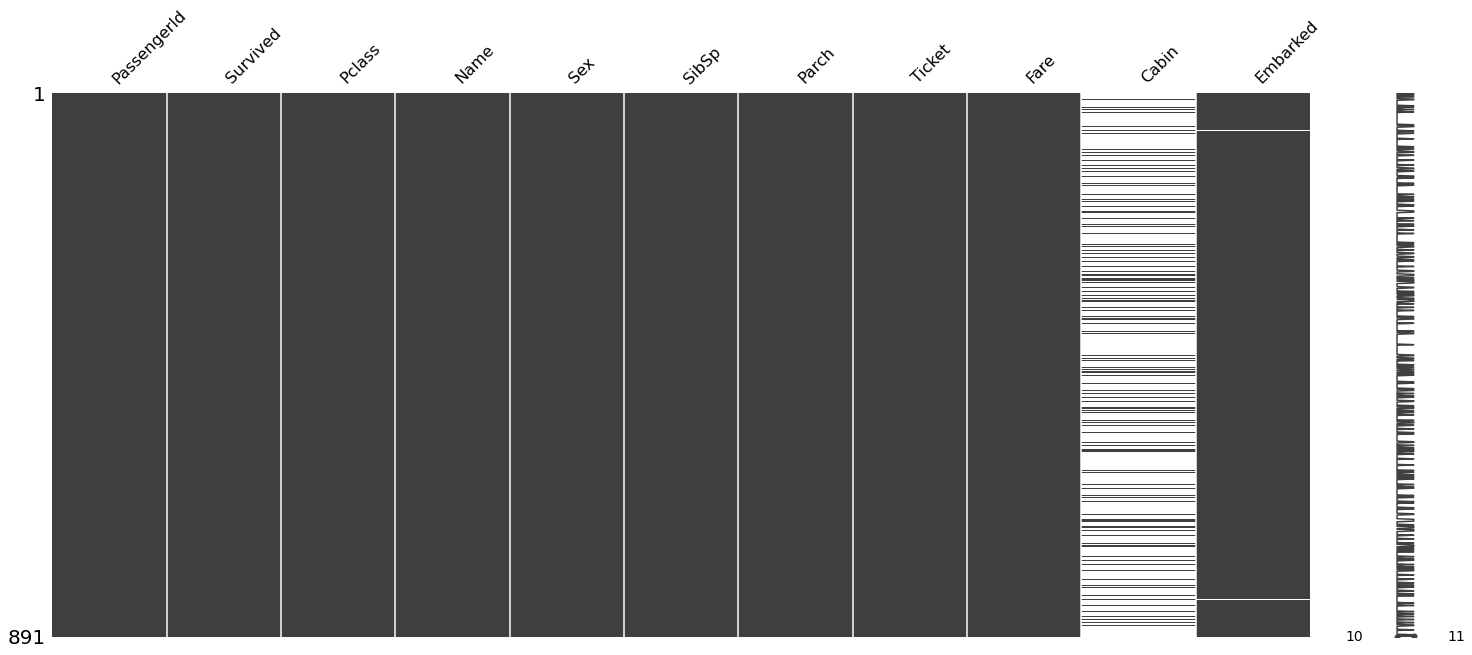

In [6]:
# 复制一份数据
train_cp = train.copy() 
# 对Age列进行处理，空值就删除整行数据
train_cp.drop(['Age'], axis=1, inplace=True)
# 图形化缺失值情况
msno.matrix(train_cp)

## 填充方式

### 非时序数据

#### 填充常量值

In [7]:
# 复制一份数据
train_constant = train.copy()
# 计算各列空值总数
print('填充缺失值之前：')
print(train_constant.isnull().sum())

# 将空值都填为0，inplace=True为必要参数
train_constant.fillna(0, inplace=True)

# 计算各列空值总数
print('填充缺失值之后：')
print(train_constant.isnull().sum())

填充缺失值之前：
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
填充缺失值之后：
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### 填充统计值(缺失值所处列的平均值、中位数、众数)

In [8]:
# 复制一份数据
train_mean = train.copy()
# 计算年龄的平均值
age_mean = train_mean['Age'].mean()
print(age_mean)
# 使用年龄的平均值填充 Age 列的缺失值
train_mean['Age'].fillna(age_mean, inplace=True)
train_mean.isnull().sum()

29.69911764705882


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 时序数据

#### 前项填充

**前项填充：使用缺失值之前的第一个非缺失值进行填充**

In [9]:
city_day = pd.read_csv('./data/city_day.csv', parse_dates=True, index_col='Date')
# 复制一份数据
city_day_cp = city_day.copy()
# 查看数据的前 5 行
city_day_cp.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [11]:
city_day_missing = missing_values_table(city_day_cp)
city_day_missing

传入的数据集共15列，
其中14列有缺失值


,缺失值,占比(%)
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [12]:
# 截取一小部分数据用于填充效果查看
city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [13]:
# 填充缺失值
city_day.fillna(method='ffill', inplace=True)
# 截取一小部分数据查看填充效果
city_day['Xylene'][50:64]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
Name: Xylene, dtype: float64

In [14]:
# 查看缺失值比例
missing_values_table(city_day)

传入的数据集共15列，
其中5列有缺失值


,缺失值,占比(%)
NH3,2009,6.803021
PM10,1594,5.397718
AQI,28,0.094816
AQI_Bucket,28,0.094816
PM2.5,27,0.091429


#### 后项填充

**后项填充：使用缺失值之后的第一个非缺失值进行填充**

In [15]:
# 截取一小部分数据用于填充效果查看
city_day['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [16]:
# 填充缺失值
city_day.fillna(method='bfill', inplace=True)
# 截取一小部分数据查看填充效果
city_day['AQI'][20:30]

Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [17]:
# 查看缺失值比例
missing_values_table(city_day)

传入的数据集共15列，
其中0列有缺失值


,缺失值,占比(%)


In [18]:
# 截取一小部分数据用于填充效果查看
city_day_cp['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

#### 线性插值填充

**线性插值填充：使用缺失值两端的非缺失值，建立线性关系，利用线性关系填充值**

In [19]:
# 线性插值填充
city_day_cp.interpolate(limit_direction='both', inplace=True)
# 截取一小部分数据用于查看填充效果
city_day_cp['Xylene'][50:65]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
Name: Xylene, dtype: float64